In [1]:
import opendatasets as op
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import nltk
%matplotlib inline

In [2]:
op.download("https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023")

Skipping, found downloaded files in "./data-science-salaries-2023" (use force=True to force download)


In [3]:
df = pd.read_csv("data-science-salaries-2023/ds_salaries.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df = df.drop(["salary", "salary_currency"], axis=1)

In [8]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [9]:
sns.set(rc={"figure.figsize":(8, 30)})
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")

<Axes: xlabel='count', ylabel='job_title'>

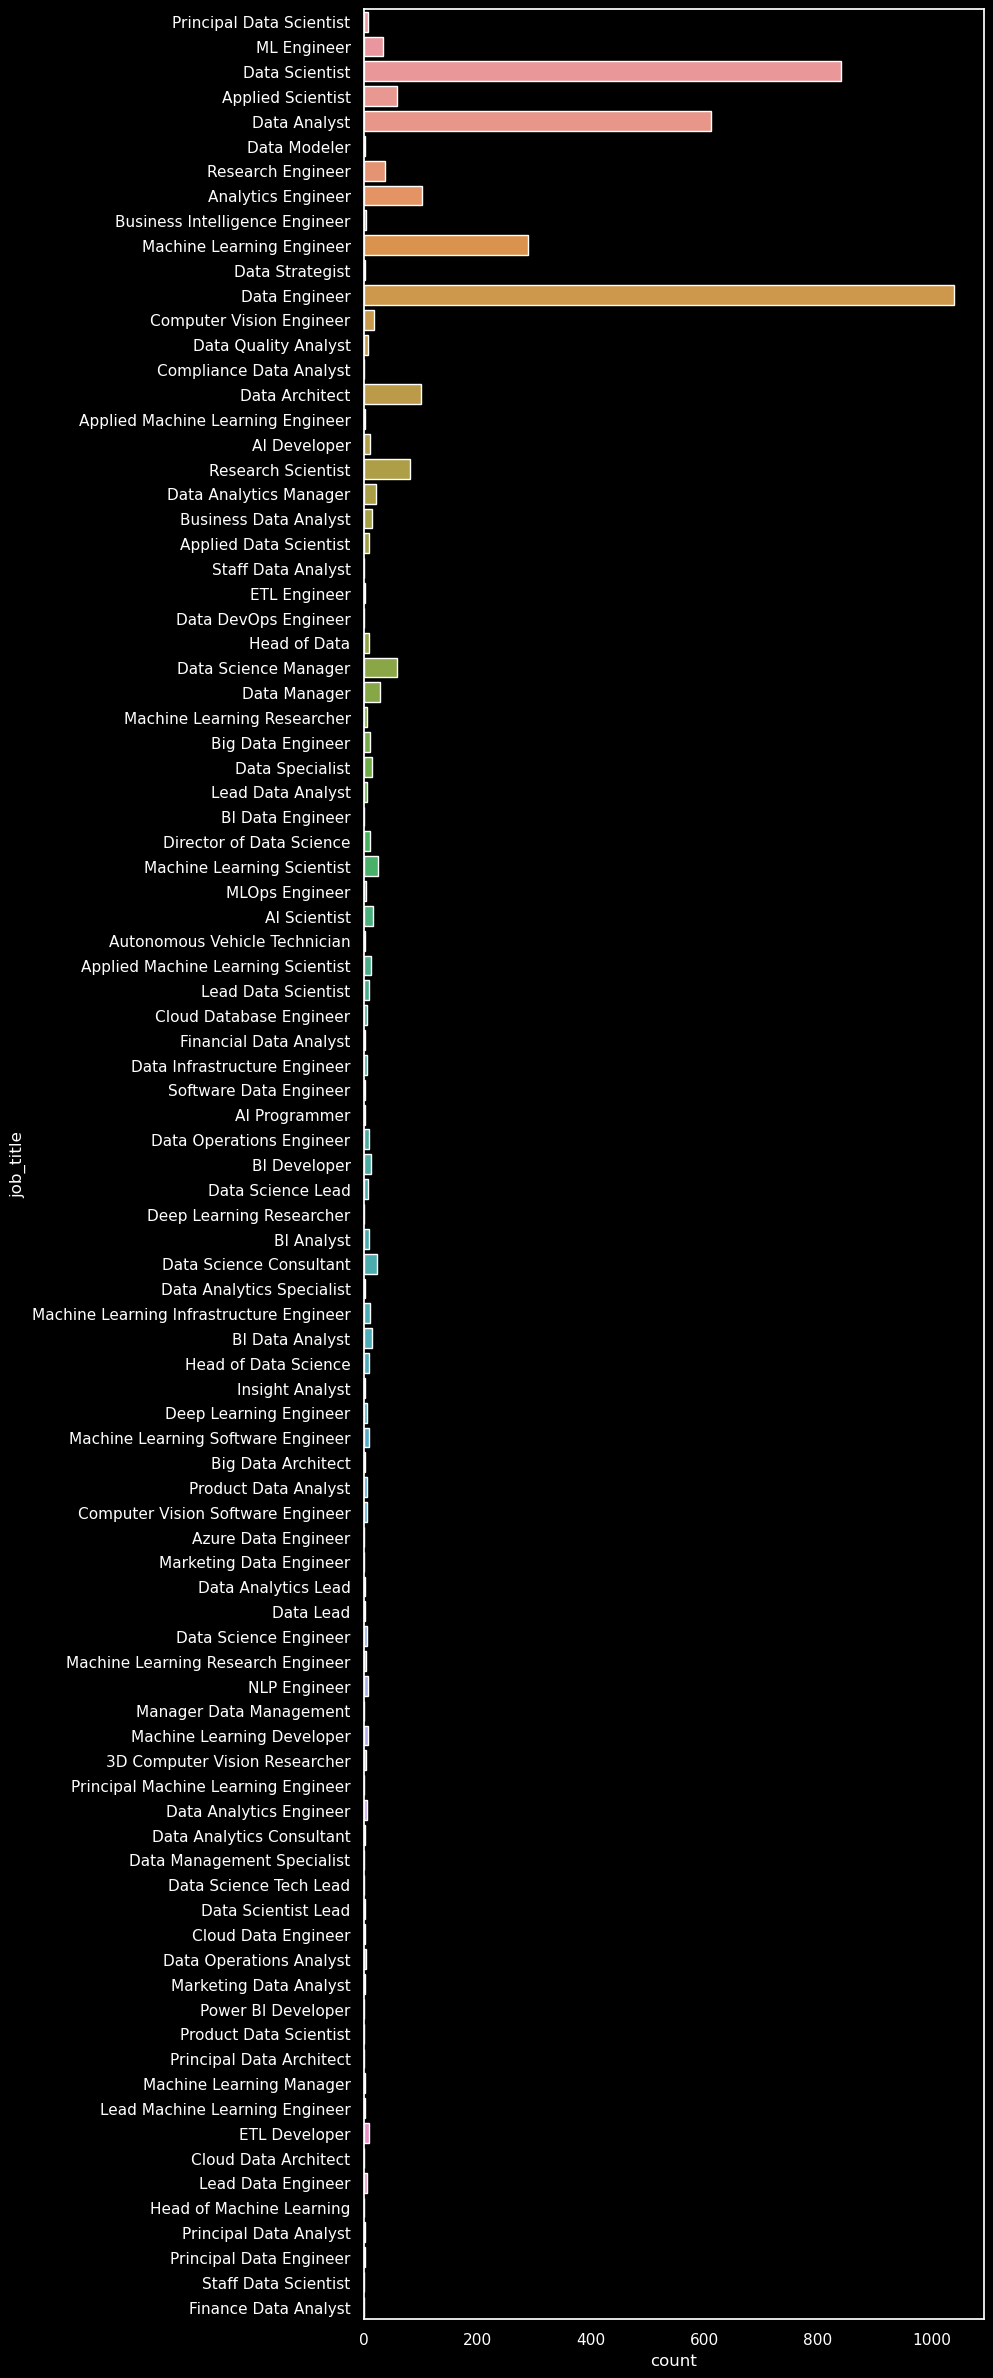

In [10]:
sns.countplot(y="job_title", data=df)

<Axes: xlabel='count', ylabel='experience_level'>

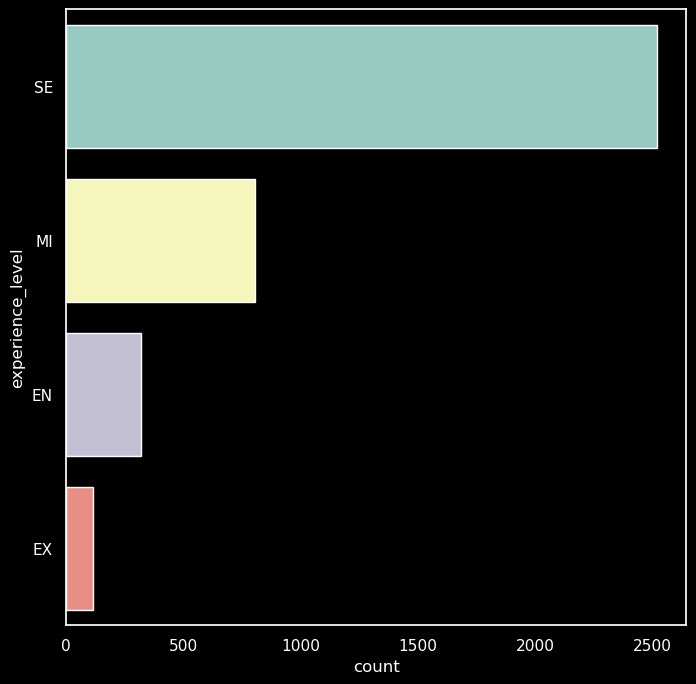

In [11]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
sns.countplot(y="experience_level", data=df)

<Axes: xlabel='count', ylabel='company_location'>

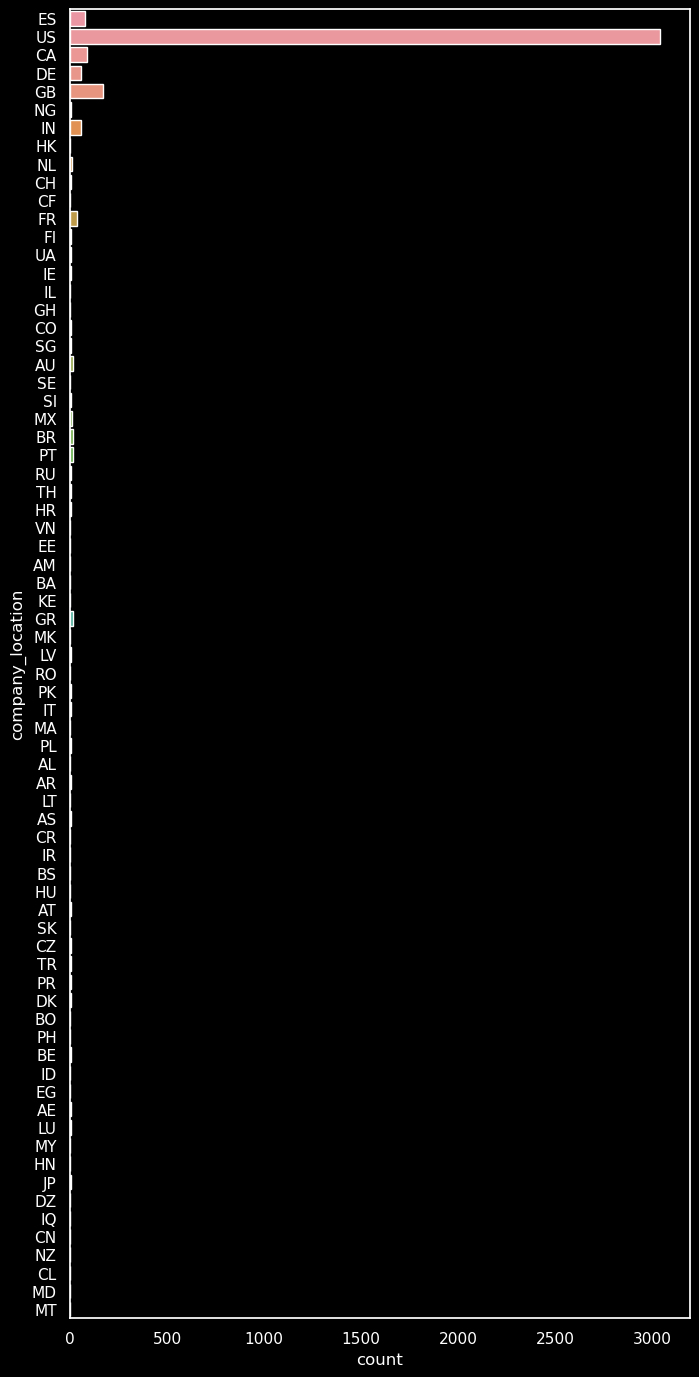

In [12]:
sns.set(rc={"figure.figsize":(8, 17)})
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
sns.countplot(y="company_location", data=df)

<Axes: xlabel='count', ylabel='company_size'>

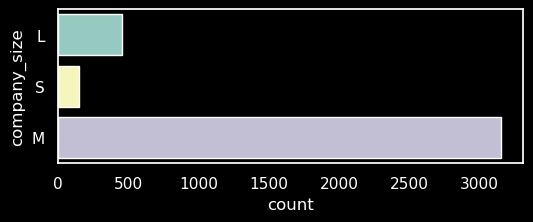

In [13]:
sns.set(rc={"figure.figsize":(6, 2)})
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
sns.countplot(y="company_size", data=df)

<Axes: xlabel='count', ylabel='work_year'>

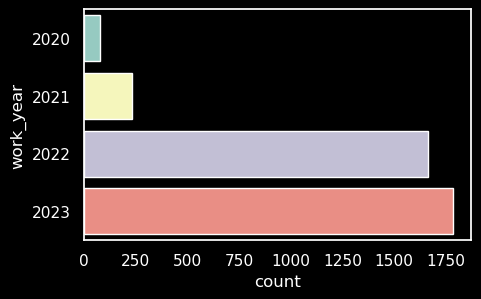

In [14]:
sns.set(rc={"figure.figsize":(5, 3)})
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
sns.countplot(y="work_year", data=df)

<Axes: xlabel='count', ylabel='remote_ratio'>

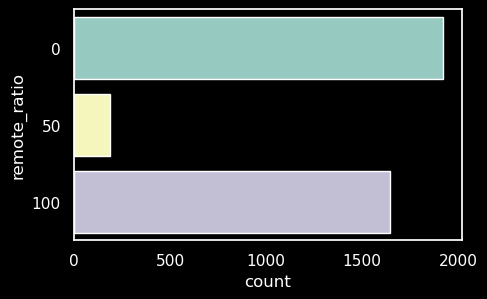

In [15]:
sns.set(rc={"figure.figsize":(5, 3)})
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
sns.countplot(y="remote_ratio", data=df)

# Top 10 Job Titles in 2023

In [16]:
jobs = df[df["work_year"]==2023]['job_title'].value_counts().nlargest(10).reset_index()

In [17]:
jobs

,index,job_title
0,Data Engineer,499
1,Data Scientist,370
2,Data Analyst,307
3,Machine Learning Engineer,158
4,Research Scientist,55
5,Data Architect,52
6,Analytics Engineer,46
7,Applied Scientist,40
8,Research Engineer,32
9,Data Manager,22


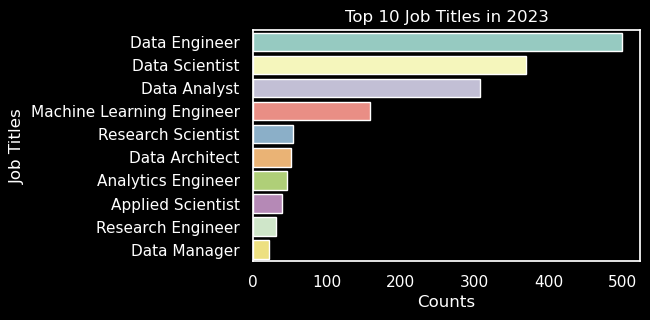

In [18]:
ax = sns.barplot(data = jobs , y = jobs['index'], x = jobs.job_title)
ax.set(ylabel='Job Titles',xlabel='Counts', title='Top 10 Job Titles in 2023')
plt.show()

In [19]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [20]:
def Word_Cloud(data, title):
    plt.figure(figsize = (15,10))
    wc = WordCloud(width = 1200, height = 800, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)
    
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

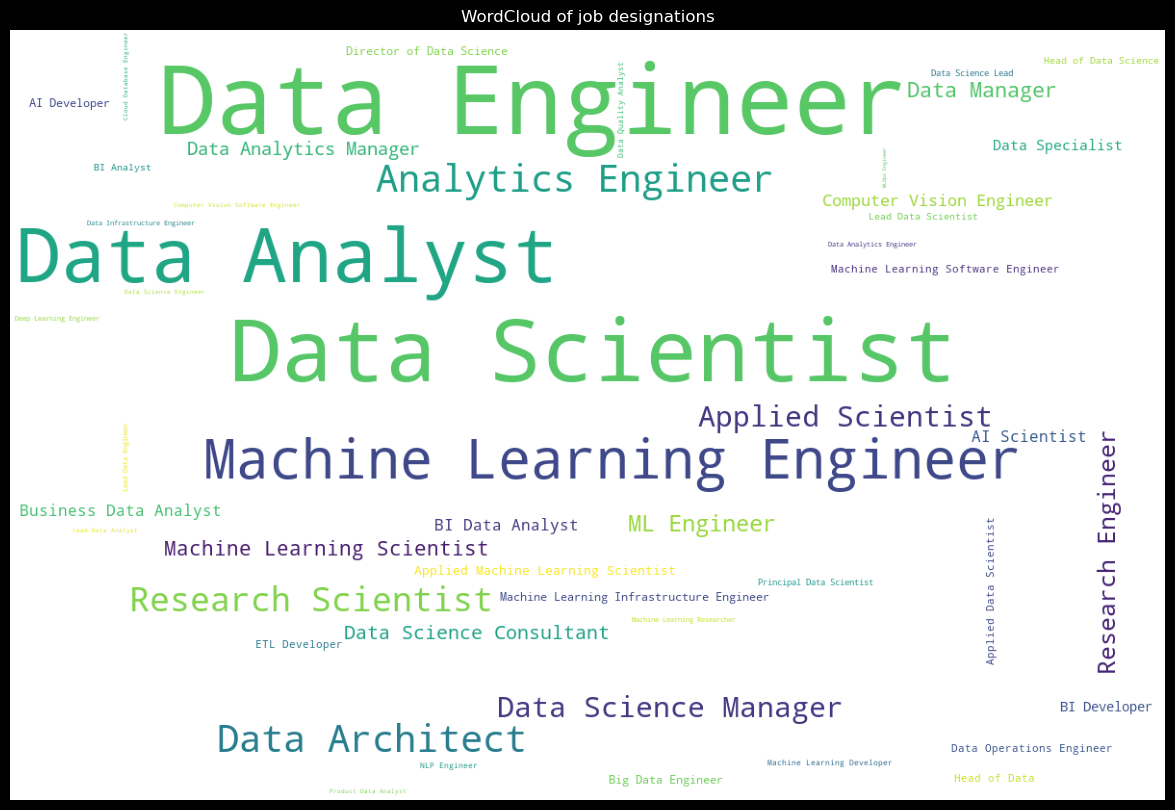

In [21]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']
Word_Cloud(data , 'WordCloud of job designations')

In [22]:
level = df["experience_level"].value_counts()

In [23]:
level

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

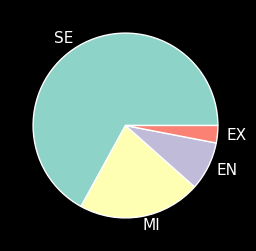

In [29]:
plt.pie(level, labels = level.index)
plt.show()

[Text(0, 0.5, 'USD')]

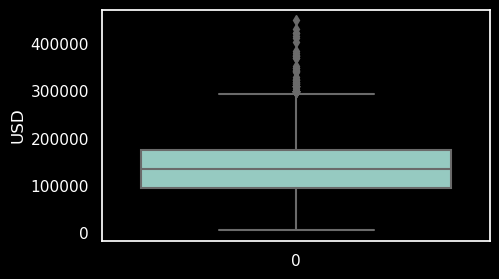

In [36]:
sal = sns.boxplot(data=df['salary_in_usd'])
sal.set(ylabel="USD")

In [37]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L
